In [7]:
# loding the libraries
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [8]:
import sys
sys.path.append('/home/theghost001/Pictures/practice_with_H/.py')

#  import logger
from logger import get_logger, log_function


In [9]:
# Initialize logger
logger = get_logger("project_logger", "project.log")


In [10]:
logger.info("Loading the data")

In [11]:
#  will do (1-15) on the data
#1. univariate analysis
#2. bivariate analysis
#3. multivariate analysis
#4. missing values
#5. outliers
#6. feature engineering
#7. feature selection
#8. model building
#9. model evaluation
#10. model deployment
#11. model monitoring
#12. model retraining
#13. model tuning
#14. model optimization
#15. model scaling

In [12]:
# # uploading data on the sqlite3 db for storage and further analysis
# import sqlite3
# #files
# csv_file = "/home/theghost001/Pictures/practice_with_H/data/combined_data.csv"
# db_file = "/home/theghost001/Pictures/practice_with_H/data/data.db"
# # connection to the sqlite3 
# con = sqlite3.connect(db_file)
# print("Connection to the sqlite3 db is successful")
# # reading the csv file into dataFrame
# df = pd.read_csv(csv_file)
# print("CSV file read into the dataFrame successfully")
# # saving the data into the sqlite3 db
# table_name = "travelData"
# df.to_sql(table_name, con, if_exists="replace",index=False)
# print("Data saved into the sqlite3 db successfully")

# uploading data on the sqlite3 db for storage and further analysis with logging also
import sqlite3
@log_function(logger)
def connection_to_db(db_path):
    con = sqlite3.connect(db_path)
    return con

@log_function(logger)
def load_data_from_csv(csv_path):
    df = pd.read_csv(csv_path)
    return df

@log_function(logger)
def save_data_to_db(con, df, table_name,index = False):
    df.to_sql(table_name, con, if_exists="replace", index=False)

# main()
try:
    logger.info("Loading the data into sqlite3 db")

    db_path = "/home/theghost001/Pictures/practice_with_H/data/data.db"
    csv_path = "/home/theghost001/Pictures/practice_with_H/data/combined_data.csv"
    table_name = "travelData"

    #making connection to the sqlite3 db
    # con = connection_to_db(db_path)
    # df = load_data_from_csv(csv_path)
    # save_data_to_db(con, df, table_name)

    with sqlite3.connect(db_path) as con:
        df = load_data_from_csv(csv_path)
        save_data_to_db(con = con, df = df, table_name = table_name,index=False)


    logger.info("Data loaded into sqlite3 db successfully")
except Exception as e:
    logger.error(f"Error: {str(e)}")
    raise
finally:
    if 'con' in locals():
        con.close()
        logger.info("Connection to the sqlite3 db closed successfully")
        



In [13]:
#testing the connection to the sqlite3 db
db_path = "/home/theghost001/Pictures/practice_with_H/data/data.db"

con = sqlite3.connect(db_path)
cursor = con.cursor()

cursor.execute("SELECT * FROM travelData LIMIT 1")
print(cursor.fetchall())
print(type(cursor.fetchall()))

con.close()

[(200000, '1984-01', 1, 41.0, 'Self Enquiry', 3, 6.0, 'Salaried', 3.0, '2015-04-28', 28, 4, 2015, 'SE', 3.0, 'Deluxe', 3.0, 'Single', 1.0, 1, 2, 1, 'Manager', 20993.0, 'Female', 'FS', 0)]
<class 'list'>


In [14]:
#testing the connection to the sqlite3 db
db_path = "/home/theghost001/Pictures/practice_with_H/data/data.db"

con = sqlite3.connect(db_path)
cursor = con.cursor()

cursor.execute("SELECT * FROM travelData")
data = cursor.fetchall()

column_names = [description[0] for description in cursor.description]

df = pd.DataFrame(data,columns=column_names)
con.close()

In [15]:
df.shape

(4888, 27)

## 1. Univariate Analysis

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              4888 non-null   int64  
 1   DateOfBirth(age)        4888 non-null   object 
 2   ProdTaken               4888 non-null   int64  
 3   Age                     4888 non-null   float64
 4   TypeofContact           4888 non-null   object 
 5   CityTier                4888 non-null   int64  
 6   DurationOfPitch         4888 non-null   float64
 7   Occupation              4888 non-null   object 
 8   Totalvisiting           4888 non-null   float64
 9   DateofBirth             4888 non-null   object 
 10  Date(birth)             4888 non-null   int64  
 11  Month(birth)            4888 non-null   int64  
 12  Year(birth)             4888 non-null   int64  
 13  TypeofContact(Allias)   4888 non-null   object 
 14  NumberOfFollowups       4888 non-null   

In [17]:
#total features
print(f"total features in df travelData is {df.shape[1]}")
#total numerical features
print(f"total numerical features in df travelData is {df.select_dtypes(include='number').shape[1]}")
#total categorical features
print(f"total categorical features in the df travelData is {df.select_dtypes(include='object').shape[1]}")

total features in df travelData is 27
total numerical features in df travelData is 17
total categorical features in the df travelData is 10


In [18]:
#list all the features that have object as dtype
categorical_features = df.select_dtypes(include=['object']).columns.to_list()
categorical_features

['DateOfBirth(age)',
 'TypeofContact',
 'Occupation',
 'DateofBirth',
 'TypeofContact(Allias)',
 'ProductPitched',
 'MaritalStatus',
 'Designation',
 'Gender',
 'MaritalStatus(Allias)']

In [19]:
# 1. univariate analysis for categorical features 
'''
1.Frequency Count: Count unique values and their frequencies.
2.Proportions: Calculate percentages for each category.
3.Visualization: Use bar plots to display the distribution.

'''

'\n1.Frequency Count: Count unique values and their frequencies.\n2.Proportions: Calculate percentages for each category.\n3.Visualization: Use bar plots to display the distribution.\n\n'

In [20]:
def univariate_analysis_categorical_features(df, categorical_features):
    for feature in categorical_features:
        if (feature.lower() == 'DateOfBirth(age)'.lower() or feature.lower() == 'DateofBirth'.lower()):
            continue
        
        print(f"Analysis for : {feature}")
        print('*'*30)

        # counting the feaq
        count = df[feature].value_counts()
        print(f'frequency count: {count}')

        #proportion
        proportion =  df[feature].value_counts(normalize = True) *100
        print(f"proportion in: {proportion}")


        #visualize
        plt.figure(figsize=(8, 4))
        sns.countplot(x=feature, data=df, palette="viridis")
        plt.title(f"Distribution of {feature}")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()



Analysis for : TypeofContact
******************************
frequency count: TypeofContact
Self Enquiry       3469
Company Invited    1419
Name: count, dtype: int64
proportion in: TypeofContact
Self Enquiry       70.969722
Company Invited    29.030278
Name: proportion, dtype: float64


/tmp/ipykernel_74265/2999445866.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="viridis")


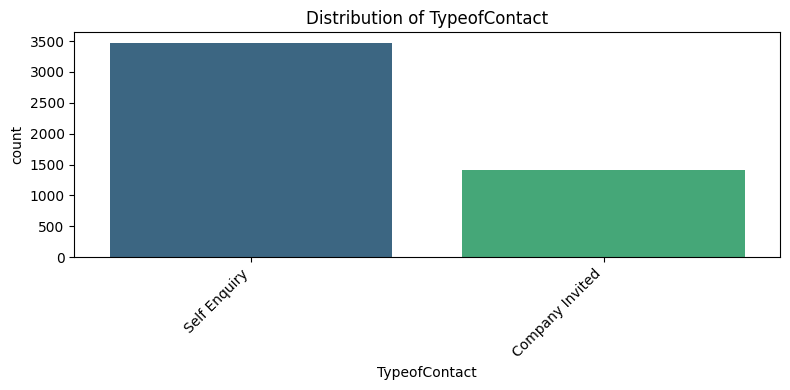

Analysis for : Occupation
******************************
frequency count: Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
proportion in: Occupation
Salaried          48.445172
Small Business    42.635025
Large Business     8.878887
Free Lancer        0.040917
Name: proportion, dtype: float64


/tmp/ipykernel_74265/2999445866.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="viridis")


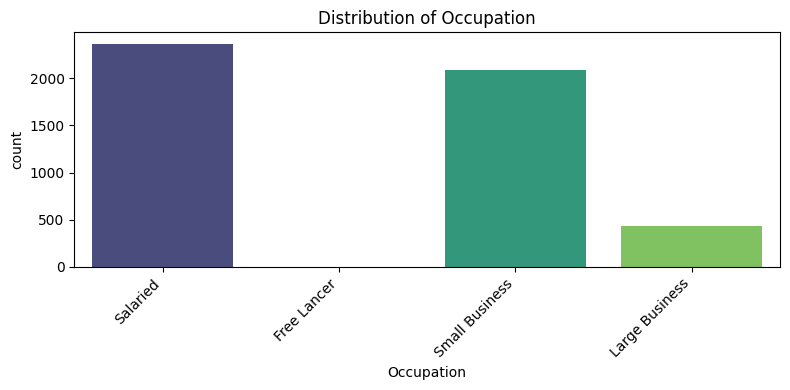

Analysis for : TypeofContact(Allias)
******************************
frequency count: TypeofContact(Allias)
SE    3469
CI    1419
Name: count, dtype: int64
proportion in: TypeofContact(Allias)
SE    70.969722
CI    29.030278
Name: proportion, dtype: float64


/tmp/ipykernel_74265/2999445866.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="viridis")


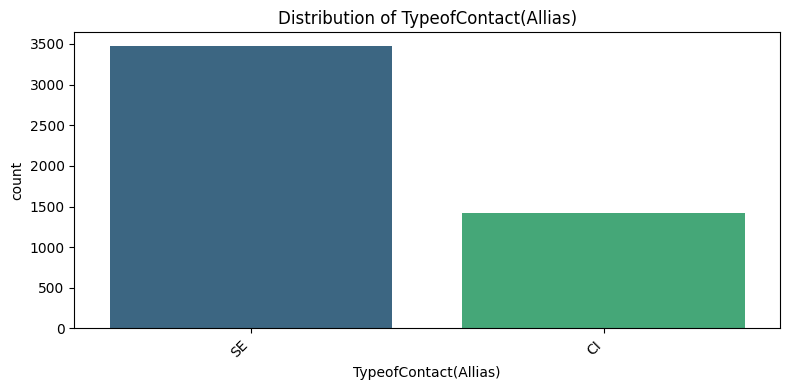

Analysis for : ProductPitched
******************************
frequency count: ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
proportion in: ProductPitched
Basic           37.684124
Deluxe          35.433715
Standard        15.180033
Super Deluxe     6.996727
King             4.705401
Name: proportion, dtype: float64


/tmp/ipykernel_74265/2999445866.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="viridis")


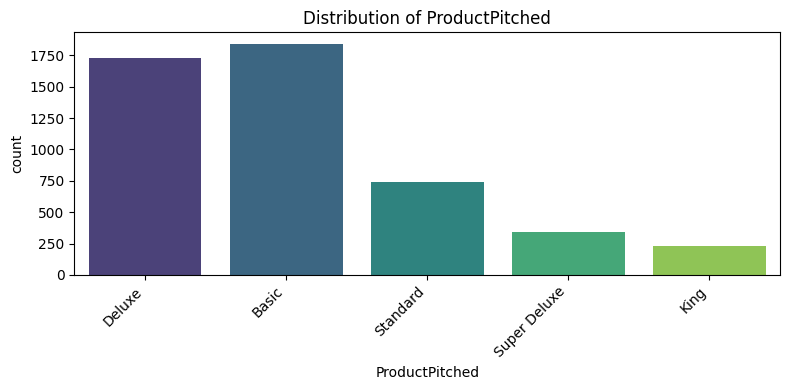

Analysis for : MaritalStatus
******************************
frequency count: MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
proportion in: MaritalStatus
Married      47.872340
Divorced     19.435352
Single       18.739771
Unmarried    13.952537
Name: proportion, dtype: float64


/tmp/ipykernel_74265/2999445866.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="viridis")


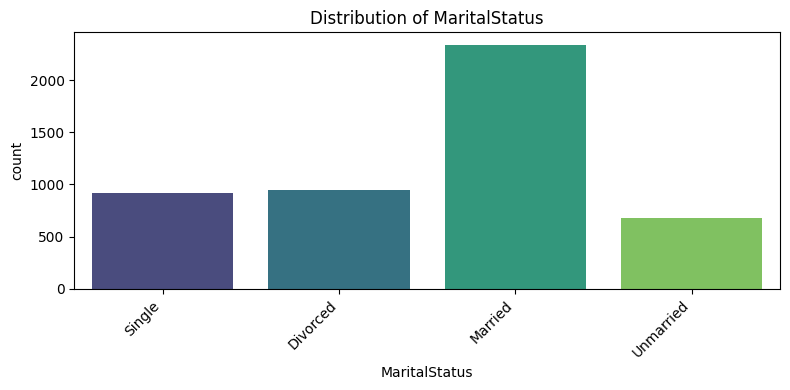

Analysis for : Designation
******************************
frequency count: Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64
proportion in: Designation
Executive         37.684124
Manager           35.433715
Senior Manager    15.180033
AVP                6.996727
VP                 4.705401
Name: proportion, dtype: float64


/tmp/ipykernel_74265/2999445866.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="viridis")


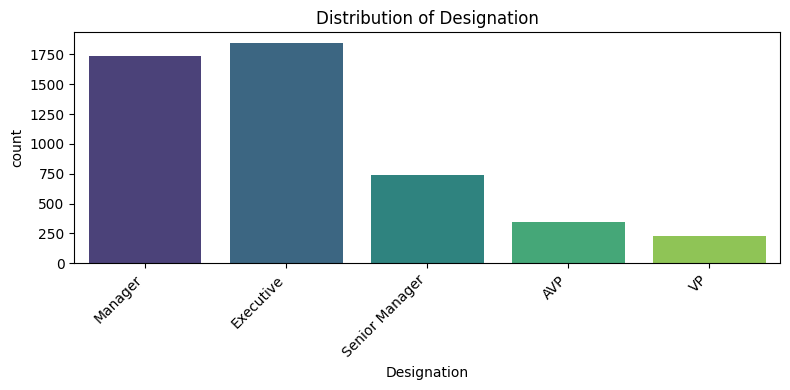

Analysis for : Gender
******************************
frequency count: Gender
Male      2916
Female    1972
Name: count, dtype: int64
proportion in: Gender
Male      59.656301
Female    40.343699
Name: proportion, dtype: float64


/tmp/ipykernel_74265/2999445866.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="viridis")


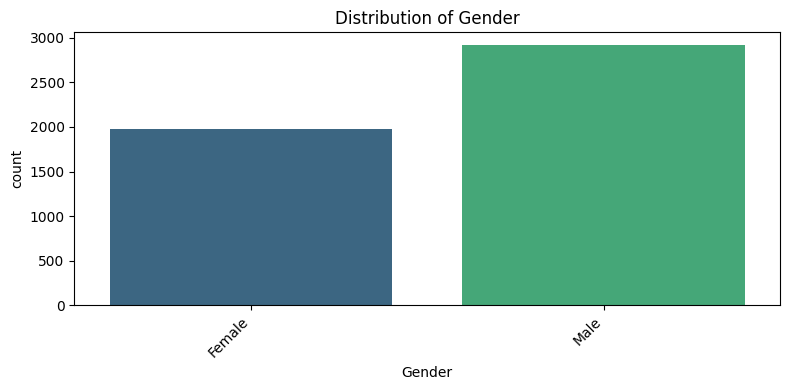

Analysis for : MaritalStatus(Allias)
******************************
frequency count: MaritalStatus(Allias)
MM    1444
FM     896
MD     564
MS     529
FS     387
FD     386
MU     379
FU     303
Name: count, dtype: int64
proportion in: MaritalStatus(Allias)
MM    29.541735
FM    18.330606
MD    11.538462
MS    10.822422
FS     7.917349
FD     7.896890
MU     7.753682
FU     6.198854
Name: proportion, dtype: float64


/tmp/ipykernel_74265/2999445866.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="viridis")


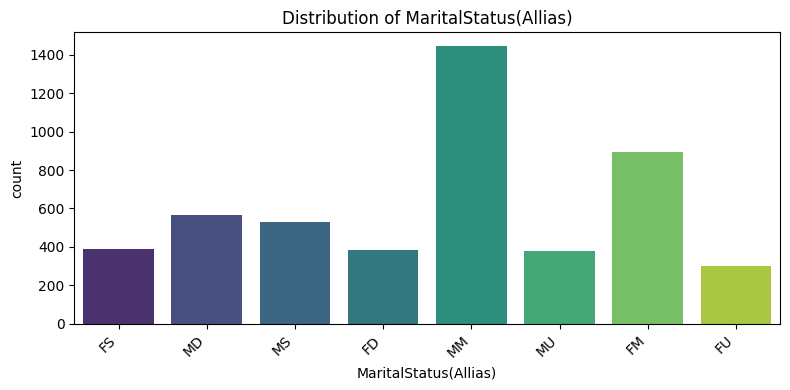

In [21]:
univariate_analysis_categorical_features(df, categorical_features)

In [33]:
df[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              4888 non-null   int64  
 1   ProdTaken               4888 non-null   int64  
 2   Age                     4888 non-null   float64
 3   CityTier                4888 non-null   int64  
 4   DurationOfPitch         4888 non-null   float64
 5   Totalvisiting           4888 non-null   float64
 6   Date(birth)             4888 non-null   int64  
 7   Month(birth)            4888 non-null   int64  
 8   Year(birth)             4888 non-null   int64  
 9   NumberOfFollowups       4888 non-null   float64
 10  PreferredPropertyStar   4888 non-null   float64
 11  NumberOfTrips           4888 non-null   float64
 12  Passport                4888 non-null   int64  
 13  PitchSatisfactionScore  4888 non-null   int64  
 14  OwnCar                  4888 non-null   

In [31]:
# univariate analysisi for numerical columns
numerical_features = df.select_dtypes(include =['int64','float64']).columns.to_list()
numerical_features

['CustomerID',
 'ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'Totalvisiting',
 'Date(birth)',
 'Month(birth)',
 'Year(birth)',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'MonthlyIncome',
 'NumberOfChildren']

In [35]:
@log_function(logger)
def univariate_analysis_numerical_features(df, numerical_features):
    for feature in numerical_features:
        print(f"Analysing for {feature}")
        print('*'*30)

        print(f"Descriptive statistics for {feature}")
        print('\n')
        print(df[feature].describe())

        #histogram for distrubution
        #box plot for outliwers
        plt.figure(figsize=(8, 4))
        sns.histplot(df[feature], kde=True, bins=30, color="skyblue", edgecolor="black")
        plt.title(f"Histogram of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

       
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[feature], color="lightcoral")
        plt.title(f"Boxplot of {feature}")
        plt.xlabel(feature)
        plt.tight_layout()
        plt.show()
    

Analysing for CustomerID
******************************
Descriptive statistics for CustomerID


count      4888.000000
mean     202443.500000
std        1411.188388
min      200000.000000
25%      201221.750000
50%      202443.500000
75%      203665.250000
max      204887.000000
Name: CustomerID, dtype: float64


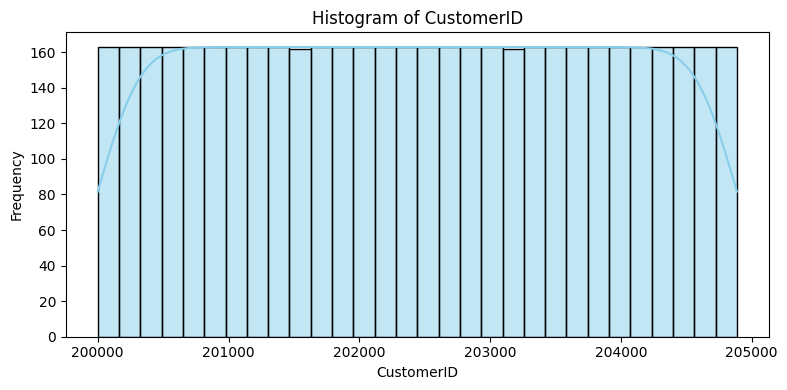

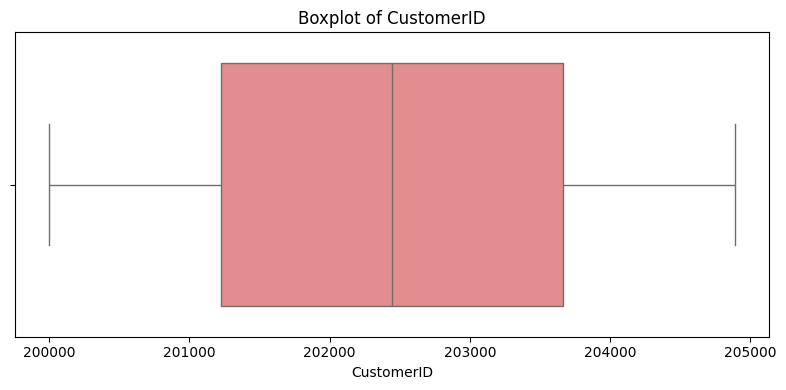

Analysing for ProdTaken
******************************
Descriptive statistics for ProdTaken


count    4888.000000
mean        0.188216
std         0.390925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: ProdTaken, dtype: float64


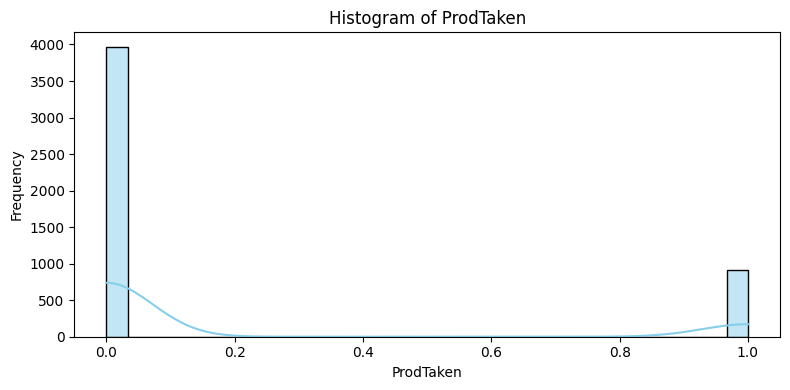

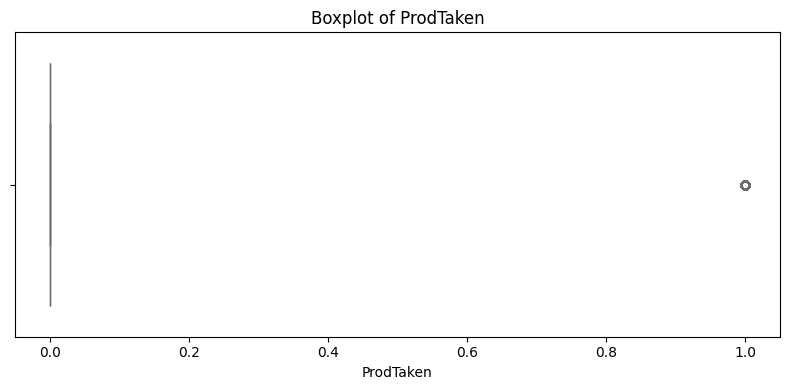

Analysing for Age
******************************
Descriptive statistics for Age


count    4888.000000
mean       37.547259
std         9.104795
min        18.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        61.000000
Name: Age, dtype: float64


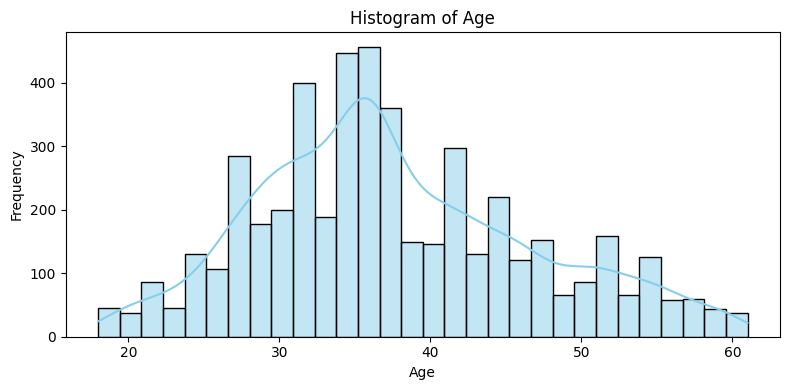

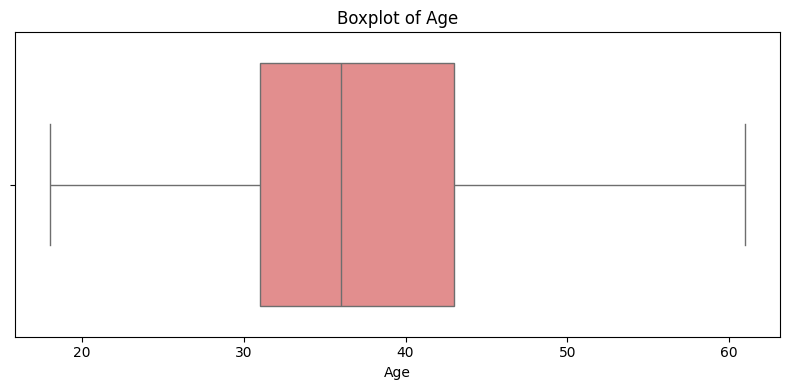

Analysing for CityTier
******************************
Descriptive statistics for CityTier


count    4888.000000
mean        1.654255
std         0.916583
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max         3.000000
Name: CityTier, dtype: float64


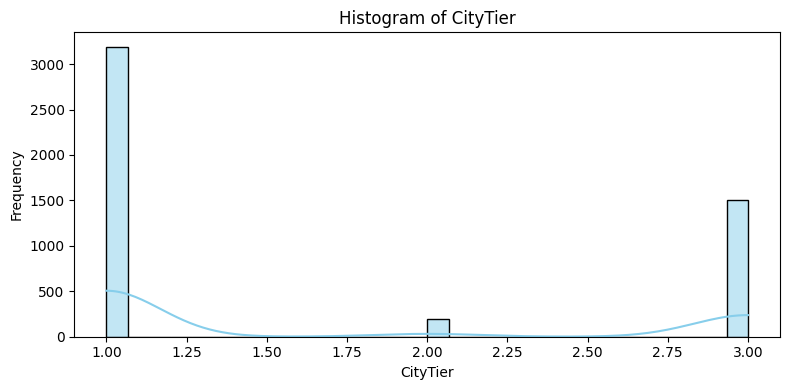

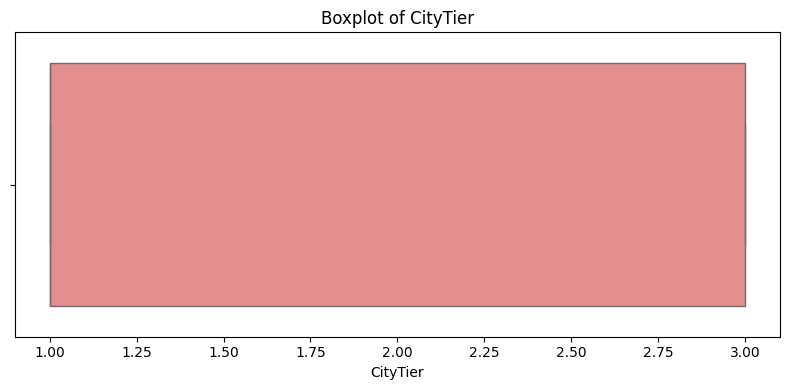

Analysing for DurationOfPitch
******************************
Descriptive statistics for DurationOfPitch


count    4888.000000
mean       15.362930
std         8.316166
min         5.000000
25%         9.000000
50%        13.000000
75%        19.000000
max       127.000000
Name: DurationOfPitch, dtype: float64


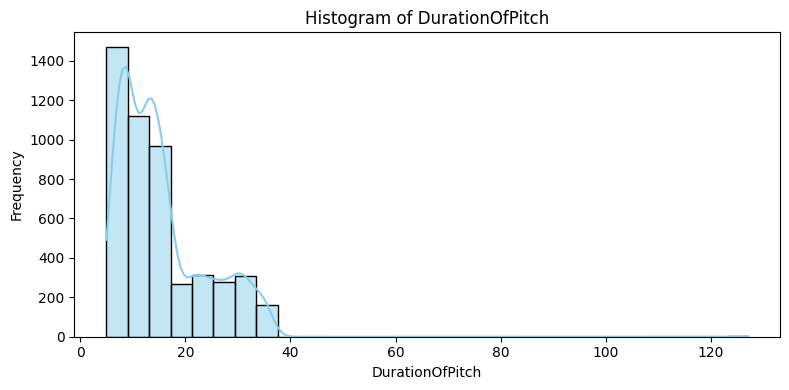

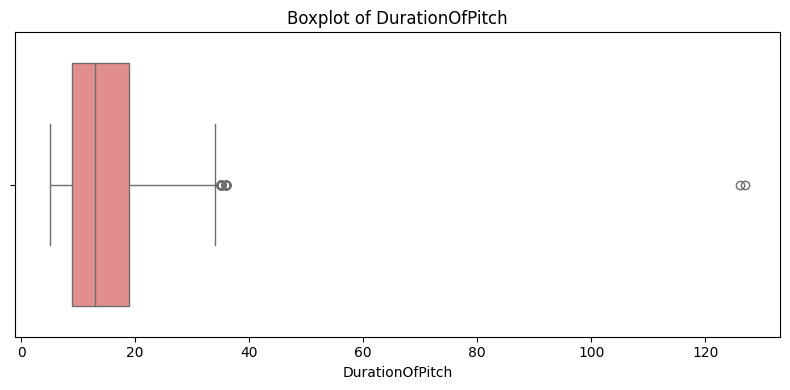

Analysing for Totalvisiting
******************************
Descriptive statistics for Totalvisiting


count    4888.000000
mean        4.089812
std         1.414617
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Totalvisiting, dtype: float64


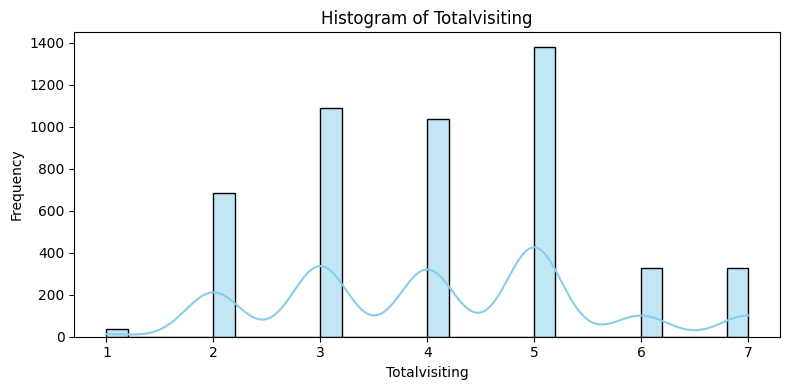

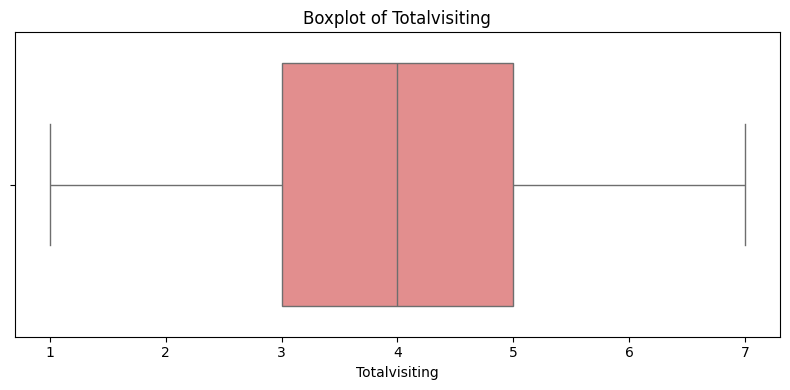

Analysing for Date(birth)
******************************
Descriptive statistics for Date(birth)


count    4888.000000
mean       15.630319
std         8.833463
min         1.000000
25%         8.000000
50%        16.000000
75%        23.000000
max        31.000000
Name: Date(birth), dtype: float64


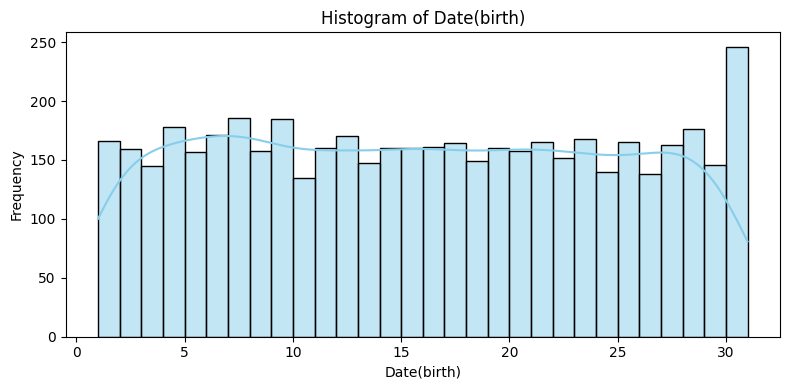

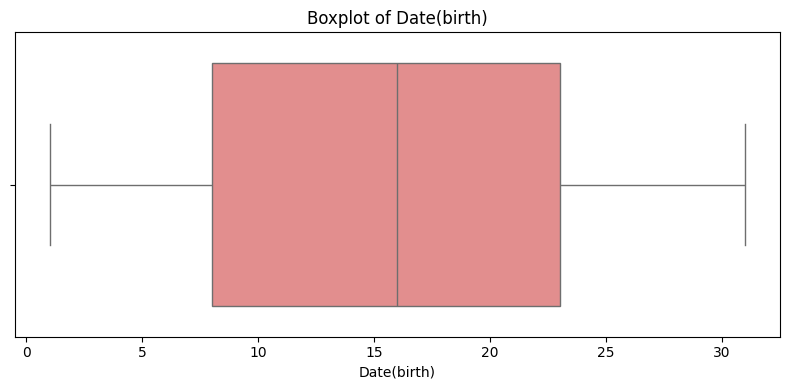

Analysing for Month(birth)
******************************
Descriptive statistics for Month(birth)


count    4888.000000
mean        6.502864
std         3.449301
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: Month(birth), dtype: float64


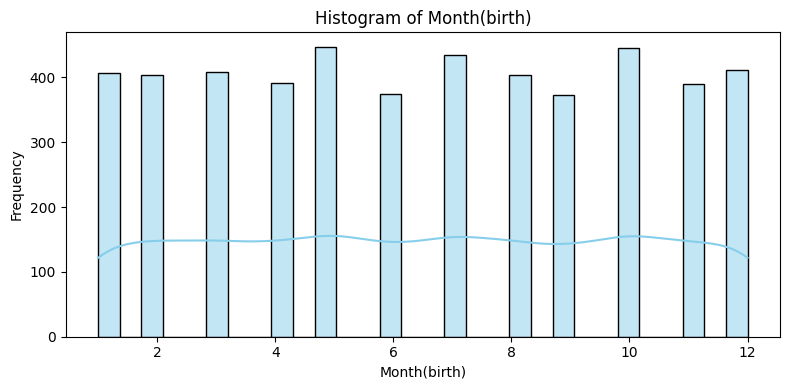

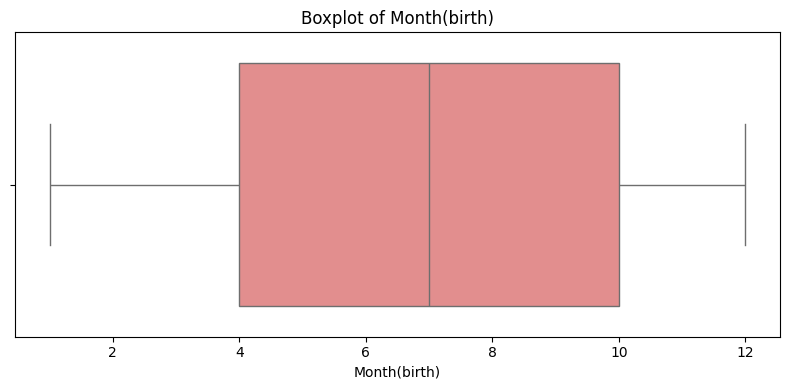

Analysing for Year(birth)
******************************
Descriptive statistics for Year(birth)


count    4888.000000
mean     2012.504092
std         1.701714
min      2010.000000
25%      2011.000000
50%      2013.000000
75%      2014.000000
max      2015.000000
Name: Year(birth), dtype: float64


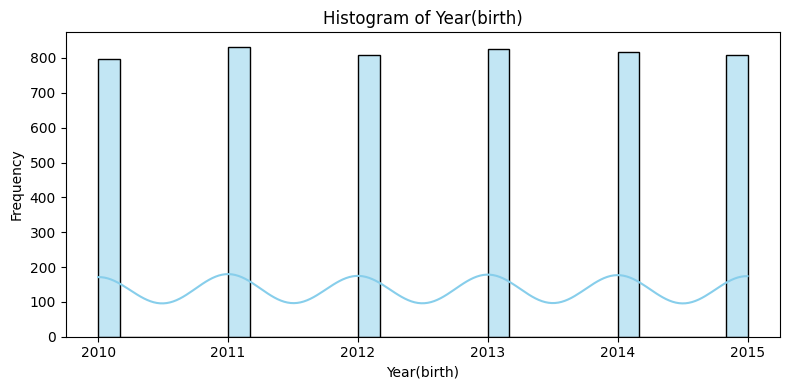

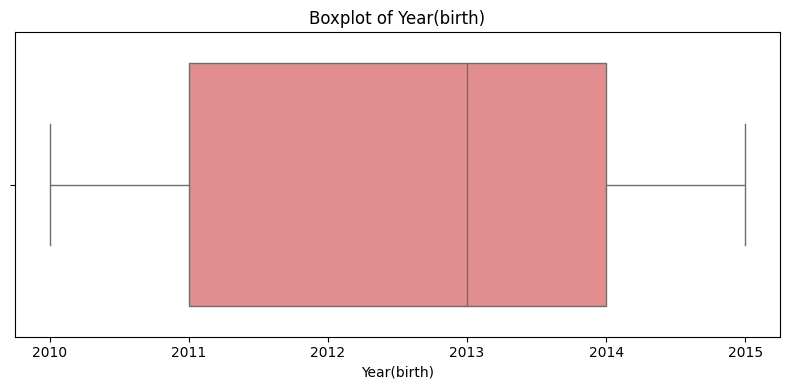

Analysing for NumberOfFollowups
******************************
Descriptive statistics for NumberOfFollowups


count    4888.000000
mean        3.711129
std         0.998271
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: NumberOfFollowups, dtype: float64


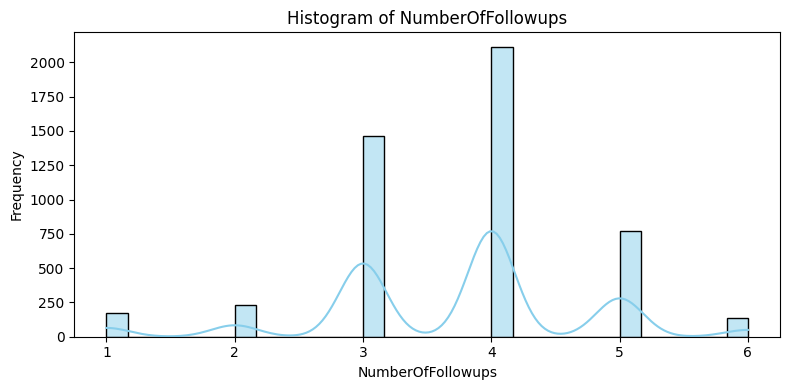

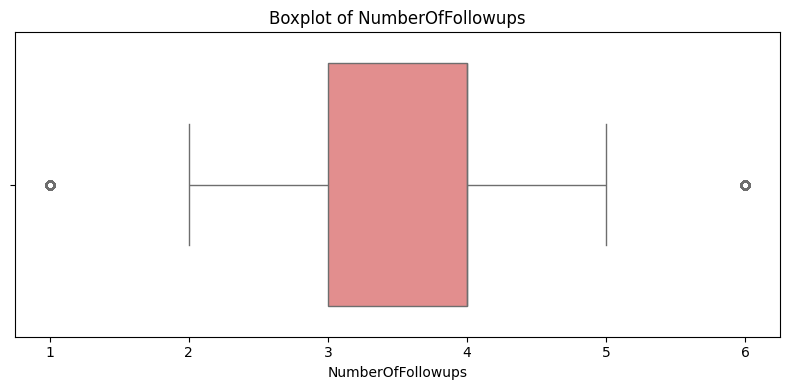

Analysing for PreferredPropertyStar
******************************
Descriptive statistics for PreferredPropertyStar


count    4888.000000
mean        3.577946
std         0.797005
min         3.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: PreferredPropertyStar, dtype: float64


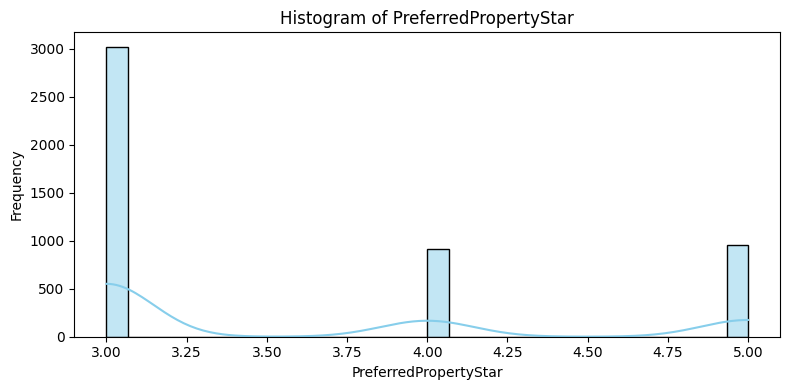

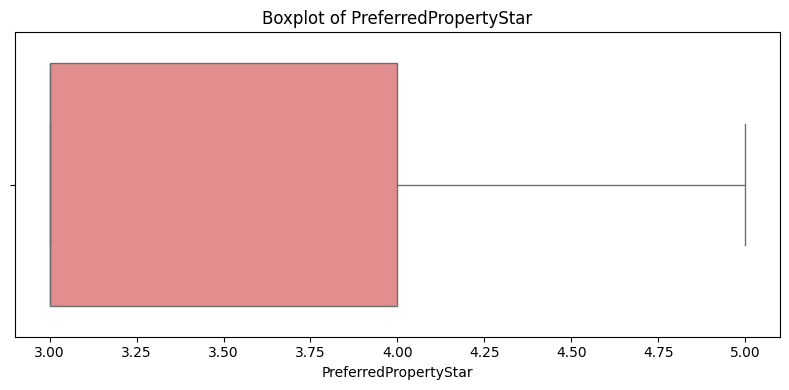

Analysing for NumberOfTrips
******************************
Descriptive statistics for NumberOfTrips


count    4888.000000
mean        3.229746
std         1.822769
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        22.000000
Name: NumberOfTrips, dtype: float64


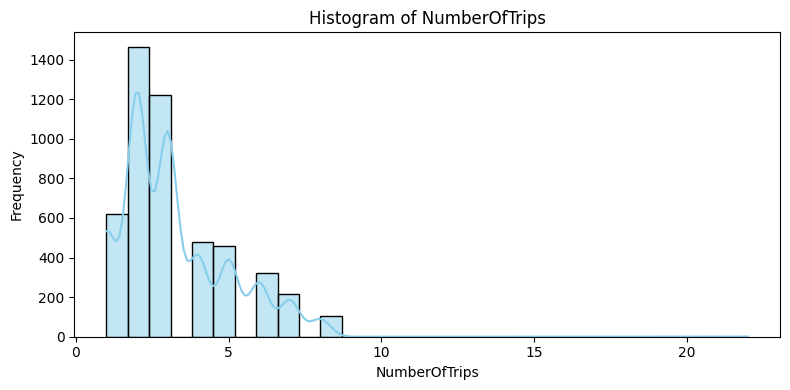

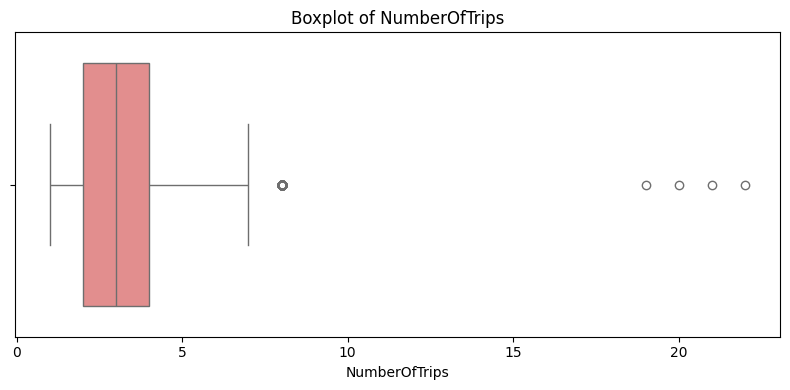

Analysing for Passport
******************************
Descriptive statistics for Passport


count    4888.000000
mean        0.290917
std         0.454232
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Passport, dtype: float64


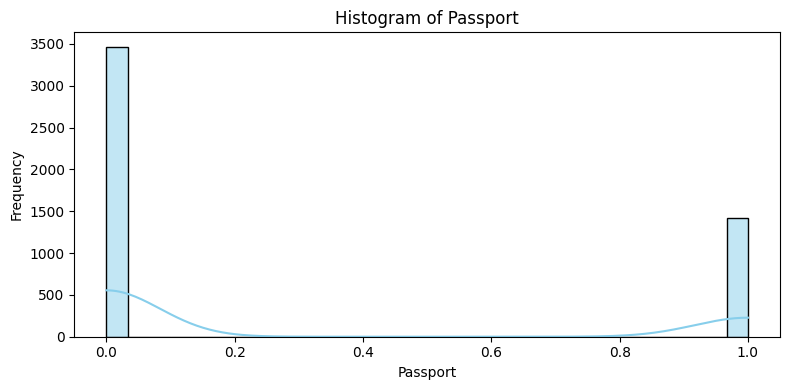

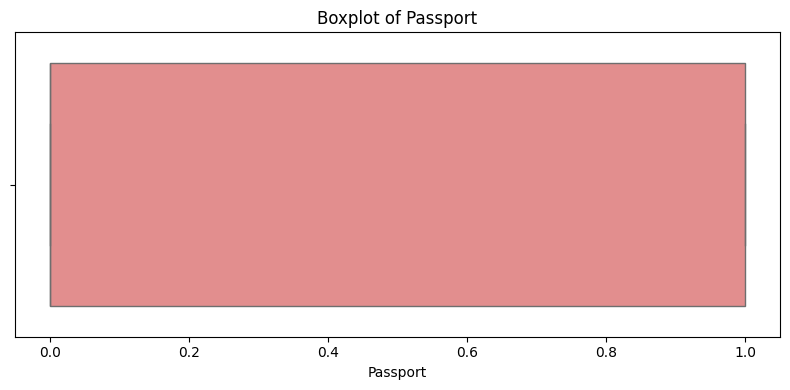

Analysing for PitchSatisfactionScore
******************************
Descriptive statistics for PitchSatisfactionScore


count    4888.000000
mean        3.078151
std         1.365792
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: PitchSatisfactionScore, dtype: float64


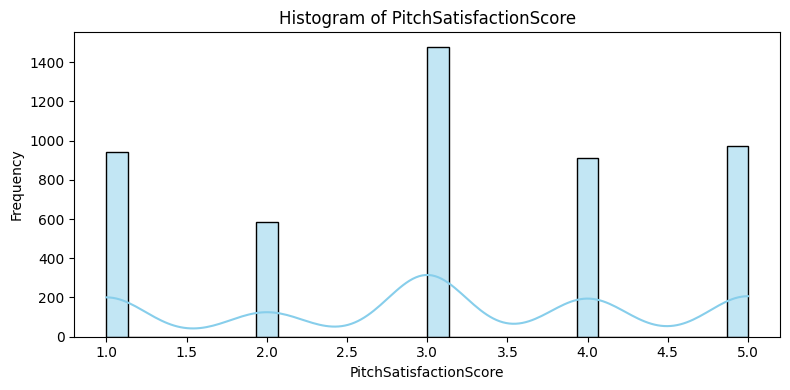

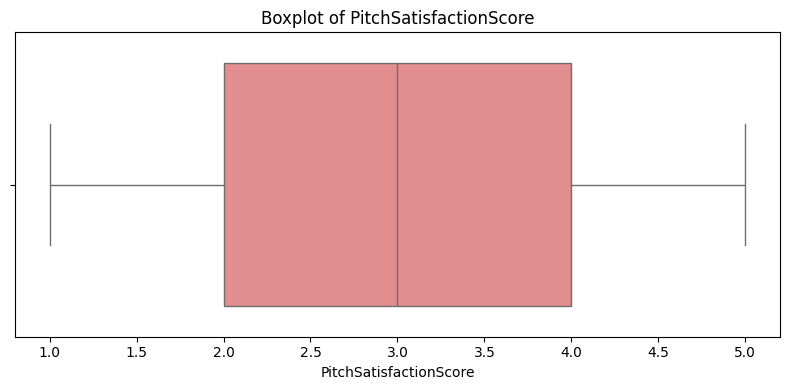

Analysing for OwnCar
******************************
Descriptive statistics for OwnCar


count    4888.000000
mean        0.620295
std         0.485363
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: OwnCar, dtype: float64


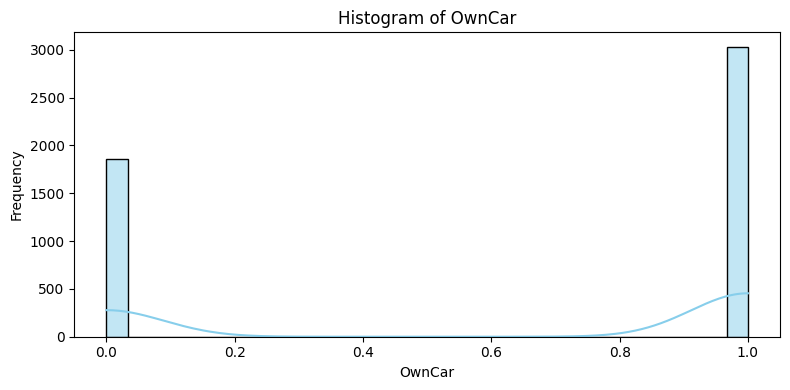

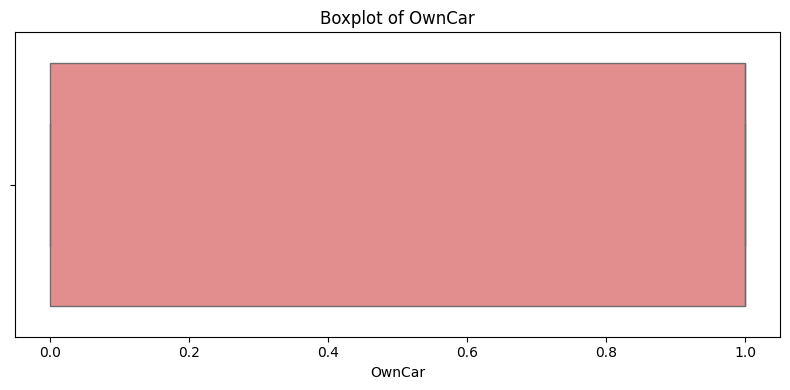

Analysing for MonthlyIncome
******************************
Descriptive statistics for MonthlyIncome


count     4888.000000
mean     23559.179419
std       5257.862921
min       1000.000000
25%      20485.000000
50%      22347.000000
75%      25424.750000
max      98678.000000
Name: MonthlyIncome, dtype: float64


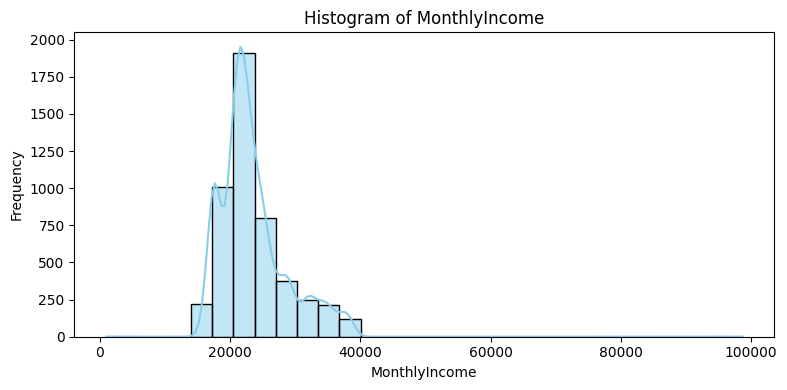

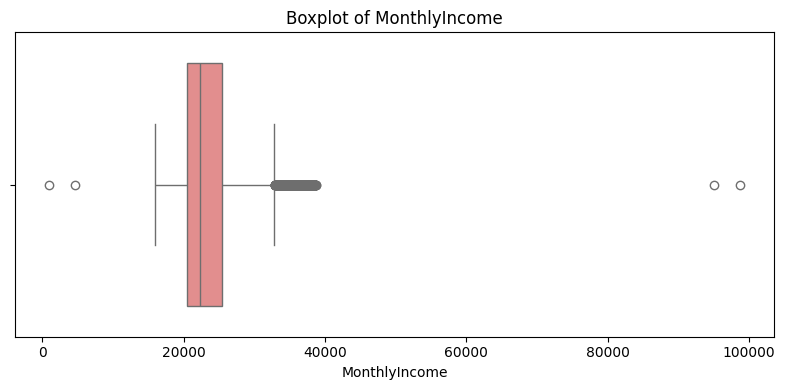

Analysing for NumberOfChildren
******************************
Descriptive statistics for NumberOfChildren


count    4888.000000
mean        0.978928
std         1.421202
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         4.000000
Name: NumberOfChildren, dtype: float64


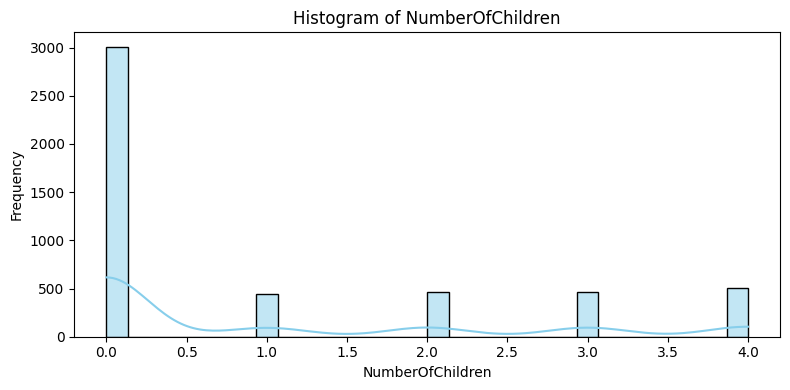

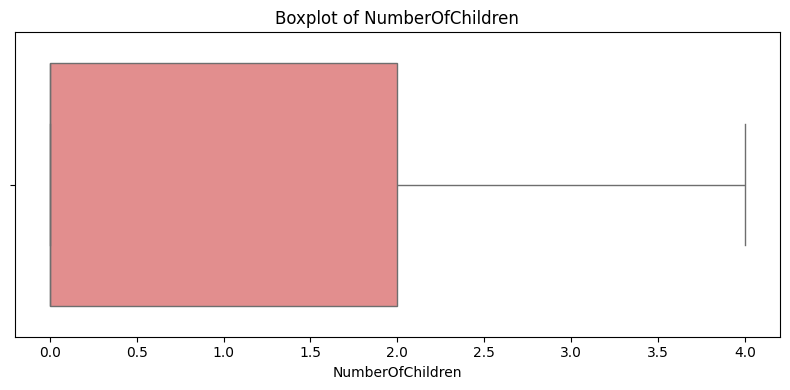

In [36]:
univariate_analysis_numerical_features(df, numerical_features)

## 2. bivariate analysis